![DSC Logo](img/dsciitplogo.jpeg)
<img src="https://www.smartdatacollective.com/wp-content/uploads/2018/11/Machine-learning-768x512.jpg" height="50px">

# Problems
### A pharmaceutical company wants to assess the stability of the active ingredient in a drug to predict its shelf life in order to meet FDA regulations and identify a suitable expiration date for the drug.
### A credit card company wants to predict monthly gift card sales and improve yearly revenue projections.
### A hotel franchise wants to identify a profile for and predict potential clients who might default on a timeshare loan in order to reduce loan qualification rates among high-risk clients, adjust interest rates based on client risk factors, and minimize company losses.
### An insurance company wants to determine the likelihood of a true problem existing when a home insurance claim was filed, in order to discourage customers from filing excessive or petty claims.

![LR](https://cdn-images-1.medium.com/max/800/1*pfmeGgGM5sxmLBQ5IQfQew.png)
# The above mentioned problems can be easily solved using regression

# Regression
![LearR](https://cdn-images-1.medium.com/max/1600/0*_9IsvpJHqgzSSMqY.jpg)


## Getting the data set

1. Go to https://www.kaggle.com/c/house-prices-advanced-regression-techniques/ and join the compitition
2. Download the data from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
#@title Are you running this notebook on Google Colab. { display-mode: "form" }
option1 = 'No' #@param ["Yes", "No"]
print('You selected', option1)
if option1 == 'Yes':
    from google.colab import files
    files.upload()
# Upload the `train.csv` and `test.csv` files which was just downloaded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
plt.style.use(style='ggplot') # Just a style of plotting a graph
plt.rcParams['figure.figsize'] = (10,6) # Some parameters for the plots

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

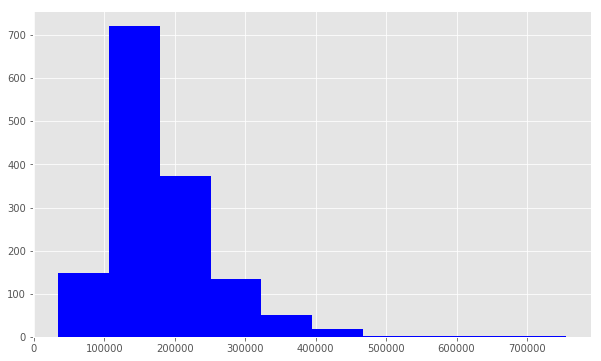

In [49]:
# Plotting an histogram 
plt.hist(train.SalePrice, color='blue')
plt.show()

Skew is: 0.12133506220520406


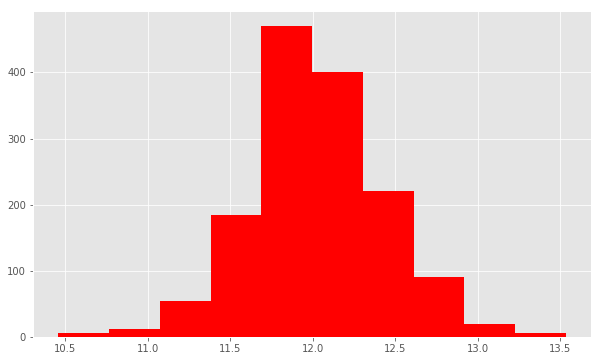

In [8]:
target = np.log(train.SalePrice) # Just taking a logarithm 
plt.hist(target,color='red')
plt.show()

In [50]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64


In [9]:
# Only using those features which are numbers
numeric_features = train.select_dtypes(include=[np.number])  
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
# Correlation b/w features: How much two features are dependent on each other
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:],'\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



In [11]:
train.OverallQual.unique() # What are the unique values for that feature

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [12]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [13]:
quality_pivot

SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390

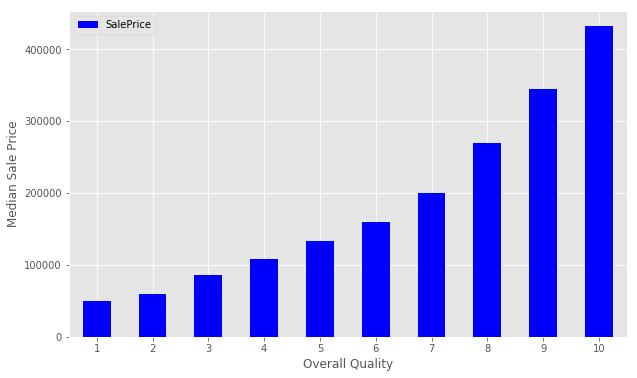

In [14]:
# Plotting a bar graph
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

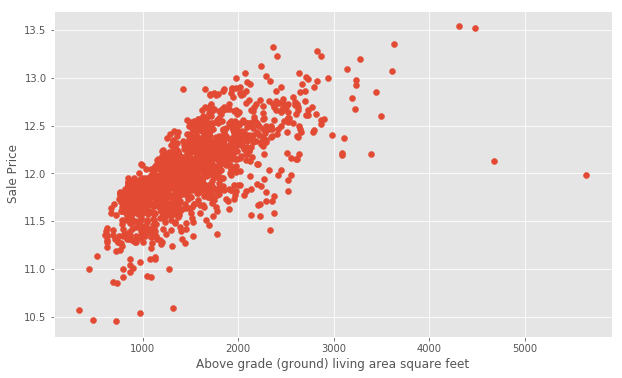

In [15]:
# Scatter --> Plotting points
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

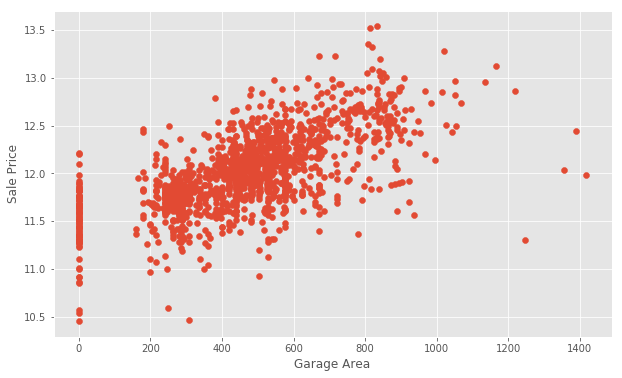

In [16]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [17]:
# Removing some of the outliers
train = train[train['GarageArea'] < 1150]

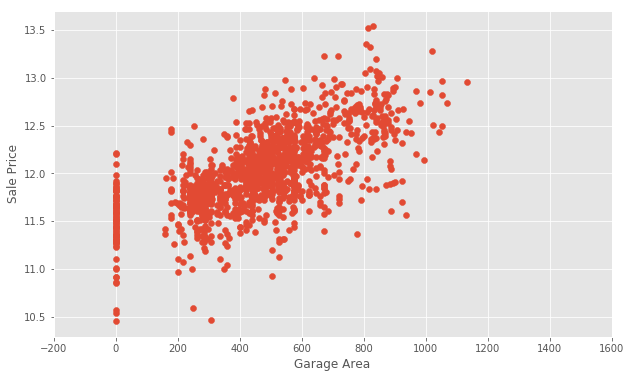

In [18]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [19]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:30])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

Null Count
Feature                 
PoolQC              1448
MiscFeature         1401
Alley               1363
Fence               1173
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0
Exterior2nd            0
Exterior1st            0
RoofMatl               0
RoofStyle              0
YearBuilt              0

In [20]:
print("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [21]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1454   1454    91     1454        1454      1454      1454   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1146   1449    50      921        1308      1453      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1454         1454       1454      ...            1373   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1377          225       1256      ...             866   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1373       1373       1373       1454      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq            605       1305       1320       1334      2    157   

       MiscFeature SaleType SaleCondition  
count           53     1454          1454  
unique           4        9             6  
top           Shed       WD        Normal  
freq            48     1266          1196  

[4 rows x 43 columns]

In [22]:
print("Original: \n")
print(train.Street.value_counts(), "\n")

Original: 

Pave    1449
Grvl       5
Name: Street, dtype: int64 



In [23]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [24]:
print('Encoded: \n')
print(train.enc_street.value_counts())

Encoded: 

1    1449
0       5
Name: enc_street, dtype: int64


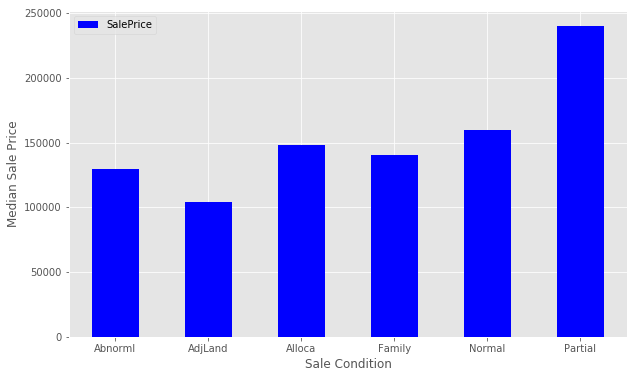

In [25]:
condition_pivot = train.pivot_table(index='SaleCondition', values = 'SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [26]:
def encode(x): return 1 if x == 'Partial' else 0

In [27]:
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = train.SaleCondition.apply(encode)

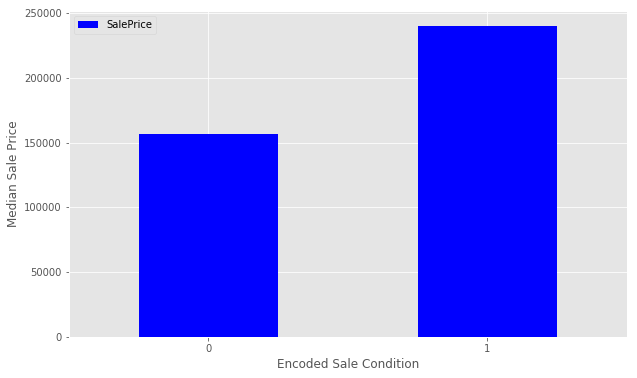

In [28]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [29]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [30]:
sum(data.isnull().sum() != 0)

0

In [31]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=.33)

In [33]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [34]:
model = lr.fit(X_train, y_train)

In [35]:
print("R^2 is: \n", model.score(X_val, y_val))

R^2 is: 
 0.8983600917731845


In [36]:
predictions = model.predict(X_val)

In [37]:
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_val, predictions))

RMSE is: 
 0.017397313279418247


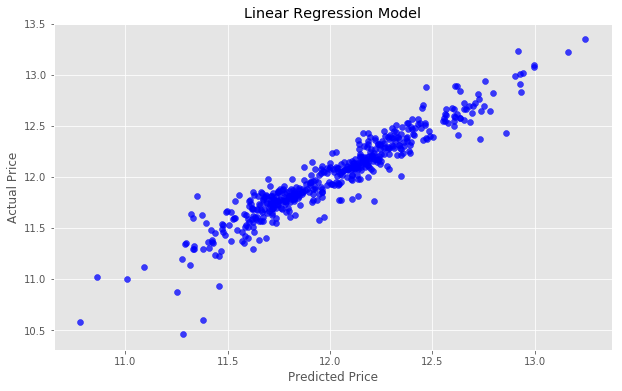

In [38]:
actual_values = y_val
plt.scatter(predictions, actual_values, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

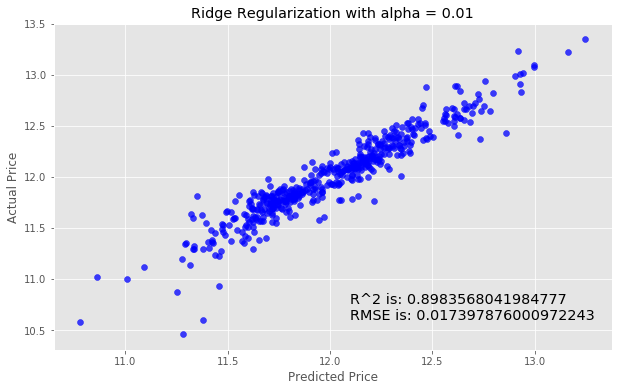

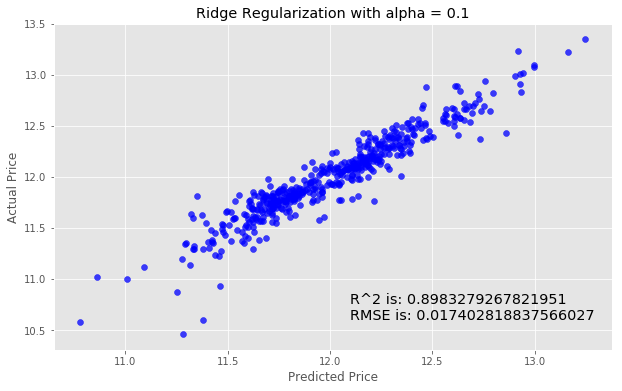

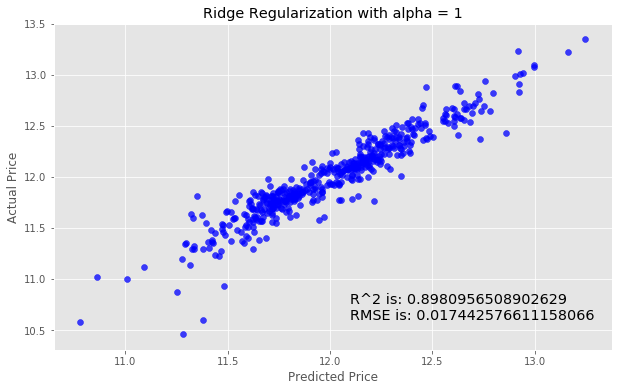

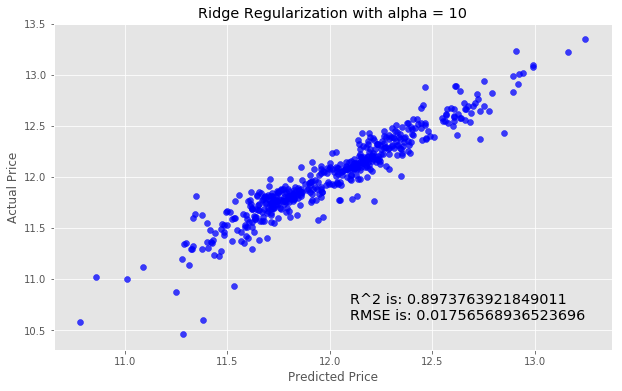

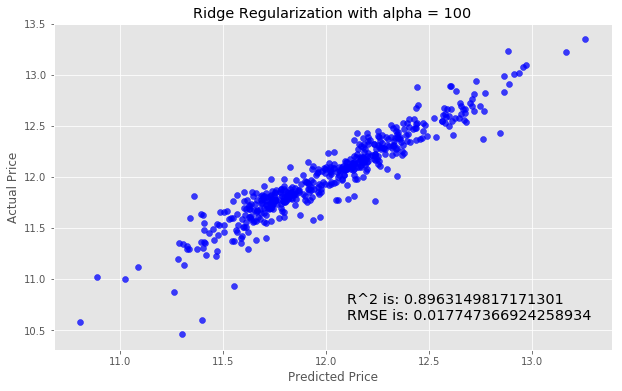

In [39]:
for i in range(-2,3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_val)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1,10.6), size='x-large')
    plt.show()

In [40]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [41]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [42]:
predictions = model.predict(feats)

In [43]:
final_predictions = np.exp(predictions) # Rember we took logarithm of SalesPrices before

In [44]:
print("Original predictions are: \n", predictions[:5], "\n")
print("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.72777788 11.89322467 12.06874048 12.1921237  12.09047181] 

Final predictions are: 
 [123967.89234554 146272.21770495 174336.12752984 197229.57797146
 178166.14879077]


In [45]:
submission['SalePrice'] = final_predictions
submission.head()

Id      SalePrice
0  1461  123967.892346
1  1462  146272.217705
2  1463  174336.127530
3  1464  197229.577971
4  1465  178166.148791

In [46]:
submission.to_csv('submission.csv', index=False) # Not writing index column to csv

## Making Kaggle submission
1. Go to https://www.kaggle.com/c/house-prices-advanced-regression-techniques/ and join the compitition
2. Go to the 'Account' tab of your user profile (`https://www.kaggle.com/<username>/account`) and select 'Create API Token'. This will trigger the download of `kaggle.json`, a file containing your API credentials. 
3. **If you are not using Google Colab** - Place this file in the location `~/.kaggle/kaggle.json` (on Windows in the location `C:\Users\<Windows-username>\.kaggle\kaggle.json` - you can check the exact location, sans drive, with `echo %HOMEPATH%`). You can define a shell environment variable `KAGGLE_CONFIG_DIR` to change this location to `$KAGGLE_CONFIG_DIR/kaggle.json` (on Windows it will be `%KAGGLE_CONFIG_DIR%\kaggle.json`).
3. **If you are using Google Colab** run below two cells

In [ ]:
#@title Are you running this notebook on Google Colab. { display-mode: "form" }
option1 = 'No' #@param ["Yes", "No"]
print('You selected', option1)
if option1 == 'Yes':
    from google.colab import files
    files.upload()
# Upload the `kaggle.json` file which was just downloaded

In [ ]:
if option1 == 'Yes':
    files.os.listdir()
# You should see `kaggle.json` in the list 

### Making the submission
![Meme](https://media.makeameme.org/created/lets-show-them-k2m3aa.jpg)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques\
        -f submission.csv -m "My first kaggle submission"

### See your submission score
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submissions